# Load data

In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("HDLTex/web_of_science", 'WOS46985',trust_remote_code=True)


In [5]:

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['input_data', 'label', 'label_level_1', 'label_level_2'],
        num_rows: 46985
    })
})


In [6]:
df = dataset["train"].to_pandas()

In [7]:
df

,input_data,label,label_level_1,label_level_2
0,(2 + 1)-dimensional non-linear optical waves t...,12,0,12
1,(beta-amyloid (A beta) and tau pathology becom...,74,5,2
2,(D)ecreasing of energy consumption and environ...,68,4,7
3,(Hybrid) electric vehicles are assumed to play...,26,1,10
4,"(L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema...",115,5,43
...,...,...,...,...
46980,Zusammenfassung Hintergrund: Karate erfreut si...,122,5,50
46981,Z-Wave is an implementation of home automation...,15,0,15
46982,Zwitterionic peptides were anchored to a condu...,110,5,38
46983,ZY-3 has been acquiring high quality imagery s...,10,0,10


In [20]:
df.label_level_1.unique()

array([0, 5, 4, 1, 6, 3, 2])

In [12]:
type(df.iloc[0]['label_level_1'])

numpy.int32

In [19]:
df.loc[df['label'] == 6].iloc[0]["input_data"]

'2-dimensional (2D) nanosheets such as graphene, graphene oxide, boron nitride or transition metal dichalcogenides can be produced on a large scale by exfoliation techniques. The lateral shape of these 2D materials is typically considered random and irregular, and their average size is often estimated using techniques characterized by strong approximations or poor statistical significance. Here we measure in a quantitative, objective way the size and shape of 2D monoatomic nanosheets using a combination of optical, electronic and scanning probe techniques. We measure, one by one, the size and shape of thousands of sheets of graphene oxide as they undergo a standard ultrasonication treatment. Using automatic image processing and statistical modelling we identify two different fragmentation processes in 2D at the nanoscale, related to two populations of nanosheets described by gamma and exponential size distributions respectively. The two populations of sheets coexist during the fragment

# Data preprocessing

In [21]:
idx_to_label = {0: "Machine_Learning", 1: "Ecology", 2: "Economics", 3: "Network_Security", 4: "Data_Management", 5: "Medicine", 6: "Materials_Science"}

In [22]:
df.head()

,input_data,label,label_level_1,label_level_2
0,(2 + 1)-dimensional non-linear optical waves t...,12,0,12
1,(beta-amyloid (A beta) and tau pathology becom...,74,5,2
2,(D)ecreasing of energy consumption and environ...,68,4,7
3,(Hybrid) electric vehicles are assumed to play...,26,1,10
4,"(L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema...",115,5,43


In [23]:
df.drop(columns=['label', 'label_level_2'], inplace=True)

In [25]:
df.rename(columns={"label_level_1": "label"}, inplace=True)

In [27]:
df.rename(columns={"input_data": "text"}, inplace=True)

In [28]:
df.head()

,text,label
0,(2 + 1)-dimensional non-linear optical waves t...,0
1,(beta-amyloid (A beta) and tau pathology becom...,5
2,(D)ecreasing of energy consumption and environ...,4
3,(Hybrid) electric vehicles are assumed to play...,1
4,"(L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema...",5


In [29]:
df['text_label'] = df['label'].apply(lambda x: idx_to_label[x])

In [30]:
df.head()

,text,label,text_label
0,(2 + 1)-dimensional non-linear optical waves t...,0,Machine_Learning
1,(beta-amyloid (A beta) and tau pathology becom...,5,Medicine
2,(D)ecreasing of energy consumption and environ...,4,Data_Management
3,(Hybrid) electric vehicles are assumed to play...,1,Ecology
4,"(L)-3,4-Dihydroxyphenylalanine ((L)-DOPA) rema...",5,Medicine


In [31]:
len(df)

46985

# Save data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)    

In [35]:
len(train_df)

42286

In [32]:
def save_dataset(df, filename):
    cnt = [0 for i in range(7)]
    for idx, row in df.iterrows():
        text = row["text"]
        label = row["text_label"]
        int_label = row["label"]
        
        #save with format: label + idx + .txt 
        with open(f"{filename}/{label}{cnt[int_label]}.txt", "w") as f:
            f.write(text)
        cnt[int_label] += 1

In [44]:
save_dataset(train_df, "../wos_data/train")

In [45]:
save_dataset(test_df, "../wos_data/test")

In [46]:
train_df.to_csv("../wos_data/train.csv", index=False)

In [47]:
test_df.to_csv("../wos_data/test.csv", index=False)

# Data analysis

## label distribution

<Axes: xlabel='text_label'>

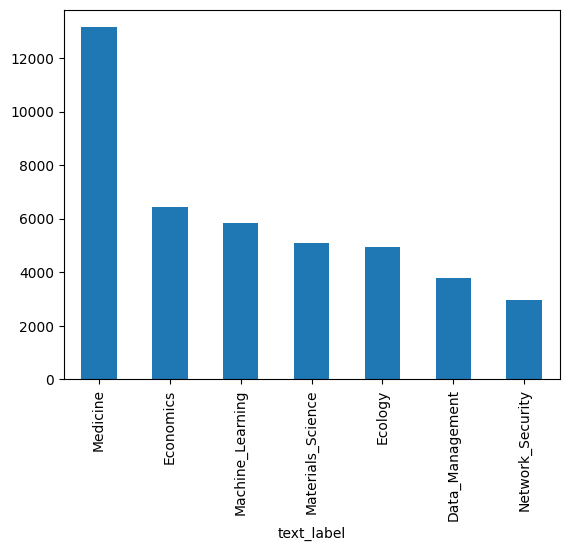

In [36]:
train_df['text_label'].value_counts().plot(kind='bar')

<Axes: xlabel='text_label'>

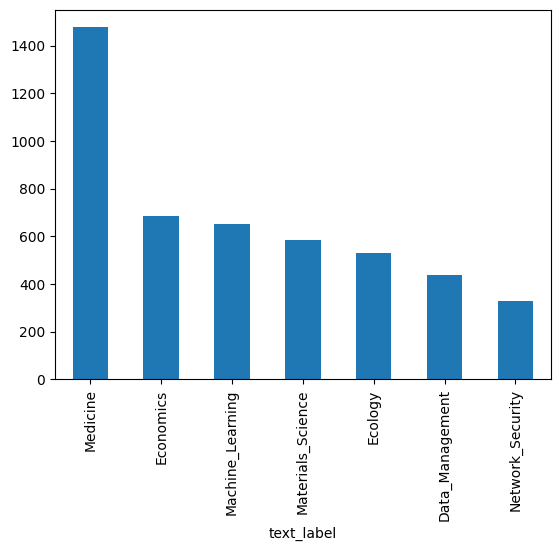

In [37]:
test_df['text_label'].value_counts().plot(kind='bar')

## Length distribution

In [41]:
train_df['text'].apply(lambda x: len(x.split(" "))).describe()

count    42286.000000
mean       199.769948
std         72.044705
min         13.000000
25%        149.000000
50%        197.000000
75%        246.000000
max       1262.000000
Name: text, dtype: float64

<Axes: ylabel='Frequency'>

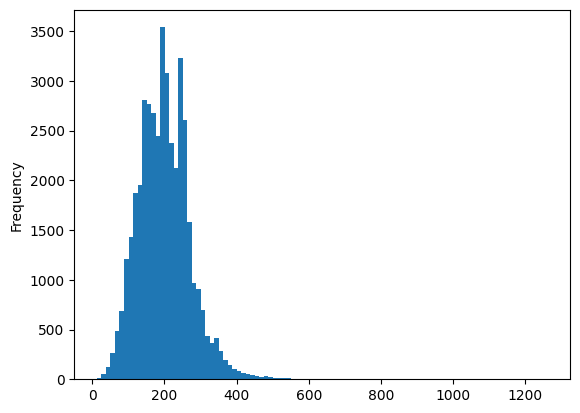

In [39]:
train_df['text'].apply(lambda x: len(x.split(" "))).plot(kind='hist', bins= 100)

In [42]:
test_df['text'].apply(lambda x: len(x.split(" "))).describe()

count    4699.000000
mean      199.811875
std        71.990616
min        32.000000
25%       150.000000
50%       197.000000
75%       245.000000
max       639.000000
Name: text, dtype: float64

<Axes: ylabel='Frequency'>

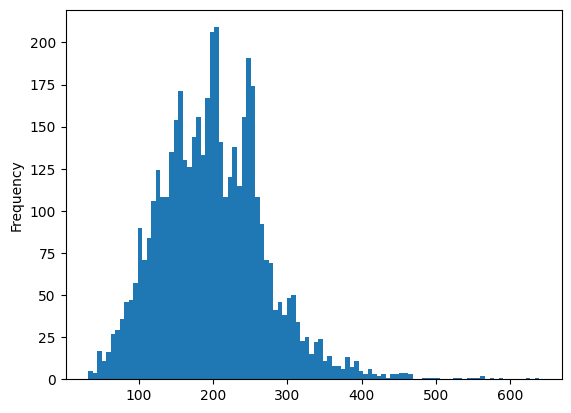

In [43]:
test_df['text'].apply(lambda x: len(x.split(" "))).plot(kind='hist', bins= 100)